# traer data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

2022-03-14 17:52:19.298307: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-14 17:52:19.298352: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
#bring your data!
path = '../../../transcriptions/targets/transcriptions_targets_clean.csv'
data = pd.read_csv(f'{path}')
data.set_index('Unnamed: 0' , inplace=True)
data.head()

,PHQ8_Binary,text,clean_text
Unnamed: 0,,,
302.0,0.0,i'm fine how about yourself . i'm from los an...,fine angeles california family friends mixture...
307.0,0.0,<laughter> . um moscow . um my family moved to...,moscow family moved moved eventually college l...
331.0,0.0,yes . okay . connecticut . um . to be an ac...,connecticut actor moved san francisco moved at...
335.0,1.0,yes . i'm okay . uh i'm from here originally ...,originally angeles weather family moved lot cu...
346.0,1.0,yes . i'm okay . here in los angeles . ther...,angeles lot things love beach love love sunny ...


In [4]:
print('null values:\n \n',data.isnull().sum())


null values:
 
 PHQ8_Binary    0
text           0
clean_text     0
dtype: int64


In [35]:
data_sample = pd.concat([data[(data.PHQ8_Binary == 0)].sample(n = 40) , data[(data.PHQ8_Binary == 1)]])

## train test split


In [37]:
X = data_sample.clean_text
y = data_sample.PHQ8_Binary

X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.3 )


In [38]:
print('length of X_train',len(X_train), 'length of X_test',len(X_test), 'length of y_train',len(y_train), 'length of y_test',len(y_test))

length of X_train 57 length of X_test 25 length of y_train 57 length of y_test 25


In [39]:
X_train

Unnamed: 0
326.0    fine ohio bigger city opportunity bigger city ...
347.0    alright york state girlfriend months ago diffe...
449.0    good originally angeles parents central americ...
356.0    eh alhambra weather nice familiar congestion r...
463.0    pretty good born angeles california fact close...
310.0    fine live hollywood seattle kind vague questio...
313.0    guess bad good denver colorado pursue job oppo...
464.0    good angeles currently reside reside inglewood...
377.0    yeah ahead grew wisconsin lived colorado bit l...
345.0    yeah great yeah angeles born santa monica yeah...
418.0    born mississippi half years santa monica never...
390.0    pretty stressful circumstances engaged minneso...
369.0    yeah great know awesome guatemala parents migr...
457.0    spectacular interesting experiment middle iowa...
468.0    pretty good feeling tired feeling pretty good ...
372.0    pretty good kind yeah angeles thing weather ea...
426.0    turn lights low listen soft music be

## word tokenize and word 2 vec

In [40]:
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

In [41]:


X_train = [word_tokenize(str(_)) for _ in X_train]
X_test = [word_tokenize(str(_)) for _ in X_test]



In [42]:


# This line trains an entire embedding for the words in your train set
word2vec = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=5)

In [43]:
word2vec.wv.index_to_key

['know',
 'yeah',
 'good',
 'things',
 'people',
 'lot',
 'pretty',
 'time',
 'mean',
 'feel',
 'guess',
 'something',
 'kinda',
 'life',
 'see',
 'years',
 'kind',
 'different',
 'school',
 'thing',
 'hard',
 'happy',
 'person',
 'love',
 'ago',
 'friends',
 'better',
 'day',
 'never',
 'family',
 'anything',
 'sleep',
 'job',
 'work',
 'wan',
 'bad',
 'great',
 'stuff',
 'eh',
 'year',
 'feeling',
 'bit',
 'long',
 'gon',
 'nice',
 'hmm',
 'wish',
 'easy',
 'fun',
 'friend',
 'thought',
 'talk',
 'situation',
 'times',
 'felt',
 'decision',
 'working',
 'regret',
 'money',
 'mind',
 'need',
 'live',
 'night',
 'mom',
 'wanted',
 'outgoing',
 'first',
 'close',
 'relationship',
 'big',
 'couple',
 'somebody',
 'difficult',
 'weather',
 'parents',
 'mother',
 'high',
 'hardest',
 'home',
 'tired',
 'positive',
 'want',
 'nothing',
 'son',
 'remember',
 'kids',
 'college',
 'talking',
 'places',
 'change',
 'real',
 'problem',
 'someone',
 'days',
 'children',
 'business',
 'sort',
 'se

# data embedding

## embed data

In [44]:
def embed_sentence(word2vec, sentence):
    # $CHALLENGIFY_BEGIN
    embedded_sentence = []
    for word in sentence:
        if word in word2vec.wv:
            embedded_sentence.append(word2vec.wv[word])
        
    return np.array(embedded_sentence)

In [45]:
def embedding(word2vec, sentences):
    # $CHALLENGIFY_BEGIN
    embed = []
    
    for sentence in sentences:
        embedded_sentence = embed_sentence(word2vec, sentence)
        embed.append(embedded_sentence)
        
    return embed
    # $CHALLENGIFY_END
    
X_train = embedding(word2vec, X_train)
X_test = embedding(word2vec, X_test)

## pad data

In [13]:
'''X_train_pad = pad_sequences(X_train, dtype='float', padding='post')
X_test_pad = pad_sequences(X_test, dtype='float', padding='post')'''

"X_train_pad = pad_sequences(X_train, dtype='float', padding='post')\nX_test_pad = pad_sequences(X_test, dtype='float', padding='post')"

In [46]:
print('number of train texts: ' ,len(X_train))
X_train[3].shape[0]

number of train texts:  57


300

In [47]:
text_word_lengths = [X_train[i].shape[0] for i in np.arange(len(X_train))]
text_word_lengths_test = [X_test[i].shape[0] for i in np.arange(len(X_test))]

<AxesSubplot:title={'center':'test data lengths'}, ylabel='Count'>

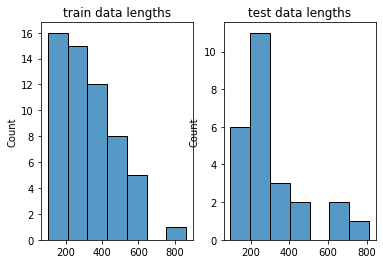

In [48]:
plt.figure()
plt.subplot(1,2,1)
plt.title('train data lengths')
sns.histplot(text_word_lengths)
plt.subplot(1,2,2)
plt.title('test data lengths')
sns.histplot(text_word_lengths_test)

In [49]:
#cortamos en 1000 words

X_train_pad = pad_sequences(X_train, dtype='float', padding='post', maxlen= 1000,truncating= 'post')
X_test_pad = pad_sequences(X_test, dtype='float', padding='post', maxlen = 1000 , truncating = 'post')


# the model

## baseline score

In [50]:
from sklearn.metrics import accuracy_score

unique, counts = np.unique(y_train, return_counts=True)
counts = dict(zip(unique, counts))
print('Number of labels in train set', counts)

y_pred = 0 if counts[0] > counts[1] else 1

print('Baseline accuracy: ', accuracy_score(y_test, [y_pred]*len(y_test)))

Number of labels in train set {0.0: 31, 1.0: 26}
Baseline accuracy:  0.36


## first neural network

In [68]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

def init_model():
    model = Sequential()
    model.add(layers.Masking())
    model.add(layers.LSTM(100, activation='tanh', return_sequences=True))
    model.add(layers.LSTM(100, activation='tanh', return_sequences=True))
    model.add(layers.LSTM(50, activation='tanh'))

    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(25, activation='tanh'))

    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(5, activation='tanh'))
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy', 'AUC','Precision','Recall'])
    
    return model

model = init_model()

In [59]:
y_train

Unnamed: 0
326.0    0.0
347.0    1.0
449.0    0.0
356.0    1.0
463.0    0.0
310.0    0.0
313.0    0.0
464.0    0.0
377.0    1.0
345.0    1.0
418.0    1.0
390.0    0.0
369.0    0.0
457.0    0.0
468.0    0.0
372.0    1.0
426.0    1.0
312.0    0.0
363.0    0.0
379.0    0.0
417.0    0.0
439.0    0.0
451.0    0.0
368.0    0.0
316.0    0.0
318.0    0.0
352.0    1.0
319.0    1.0
346.0    1.0
376.0    1.0
388.0    1.0
341.0    0.0
422.0    1.0
320.0    1.0
443.0    0.0
416.0    0.0
386.0    1.0
367.0    1.0
392.0    0.0
402.0    1.0
448.0    1.0
412.0    1.0
335.0    1.0
485.0    0.0
441.0    1.0
303.0    0.0
440.0    1.0
371.0    0.0
315.0    0.0
395.0    0.0
355.0    1.0
382.0    0.0
413.0    1.0
350.0    1.0
325.0    1.0
458.0    0.0
391.0    0.0
Name: PHQ8_Binary, dtype: float64

In [69]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=50, restore_best_weights=True)

history_fit = model.fit(X_train_pad, y_train.values, 
          batch_size = 32,
          epochs=100,
          validation_split=0.3,
          callbacks=[es],
          verbose = 1
         )

Epoch 1/100
2/2 [==============================] - 25s 7s/step - loss: 0.7931 - accuracy: 0.4615 - auc: 0.4035 - precision: 0.4000 - recall: 0.6250 - val_loss: 0.6970 - val_accuracy: 0.4444 - val_auc: 0.6250 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 5s 2s/step - loss: 0.6808 - accuracy: 0.5897 - auc: 0.5883 - precision: 0.5000 - recall: 0.5625 - val_loss: 0.7204 - val_accuracy: 0.4444 - val_auc: 0.5500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 6s 3s/step - loss: 0.7621 - accuracy: 0.4615 - auc: 0.4307 - precision: 0.3529 - recall: 0.3750 - val_loss: 0.6876 - val_accuracy: 0.5556 - val_auc: 0.5375 - val_precision: 0.5556 - val_recall: 1.0000
Epoch 4/100
2/2 [==============================] - 5s 3s/step - loss: 0.6822 - accuracy: 0.4872 - auc: 0.5448 - precision: 0.4091 - recall: 0.5625 - val_loss: 0.6948 - val_accuracy: 0.4444 - val_auc: 0.6500 - val_precision: 0.0

2/2 [==============================] - 5s 3s/step - loss: 0.6548 - accuracy: 0.5641 - auc: 0.6318 - precision: 0.4286 - recall: 0.1875 - val_loss: 0.7636 - val_accuracy: 0.4444 - val_auc: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 33/100
2/2 [==============================] - 5s 2s/step - loss: 0.6910 - accuracy: 0.6154 - auc: 0.4688 - precision: 0.6000 - recall: 0.1875 - val_loss: 0.7406 - val_accuracy: 0.4444 - val_auc: 0.4375 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 34/100
2/2 [==============================] - 5s 3s/step - loss: 0.6804 - accuracy: 0.6154 - auc: 0.5557 - precision: 0.5714 - recall: 0.2500 - val_loss: 0.8006 - val_accuracy: 0.4444 - val_auc: 0.5500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 35/100
2/2 [==============================] - 5s 3s/step - loss: 0.7402 - accuracy: 0.5641 - auc: 0.4090 - precision: 0.3333 - recall: 0.0625 - val_loss: 0.7467 - val_accuracy: 0.4444 - val_auc: 0.5000 - val_precision: 0.000

In [21]:
'''import joblib
joblib.dump(model, 'rnn_reddit.sav')'''

2022-03-10 19:24:49.067663: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://849c2deb-a514-4095-ab82-9e0451bf807c/assets


INFO:tensorflow:Assets written to: ram://849c2deb-a514-4095-ab82-9e0451bf807c/assets


['rnn_reddit.sav']

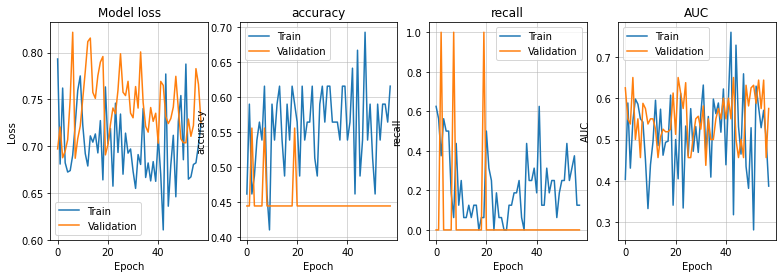

In [70]:
def plot_loss_mae(history):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    #ax1.set_ylim(ymin=0, ymax=200)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['accuracy'])
    ax2.plot(history.history['val_accuracy'])
    ax2.set_title('accuracy')
    ax2.set_ylabel('accuracy')
    ax2.set_xlabel('Epoch')
    #ax2.set_ylim(ymin=0, ymax=20)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    
    
    ax3.plot(history.history['recall'])
    ax3.plot(history.history['val_recall'])
    ax3.set_title('recall')
    ax3.set_ylabel('recall')
    ax3.set_xlabel('Epoch')
    #ax3.set_ylim(ymin=0, ymax=20)
    ax3.legend(['Train', 'Validation'], loc='best')
    ax3.grid(axis="x",linewidth=0.5)
    ax3.grid(axis="y",linewidth=0.5)
    
    ax4.plot(history.history['auc'])
    ax4.plot(history.history['val_auc'])
    ax4.set_title('AUC')
    ax4.set_ylabel('AUC')
    ax4.set_xlabel('Epoch')
    #ax4.set_ylim(ymin=0, ymax=20)
    ax4.legend(['Train', 'Validation'], loc='best')
    ax4.grid(axis="x",linewidth=0.5)
    ax4.grid(axis="y",linewidth=0.5)
    
    plt.show()

plot_loss_mae(history_fit)

In [72]:
evaluation = model.evaluate(X_test_pad , y_test.values , verbose = 1 , return_dict=True)

1/1 [==============================] - 1s 531ms/step - loss: 0.6794 - accuracy: 0.6400 - auc: 0.2569 - precision: 0.6400 - recall: 1.0000


In [73]:
evaluation

{'loss': 0.6794221997261047,
 'accuracy': 0.6399999856948853,
 'auc': 0.2569444477558136,
 'precision': 0.6399999856948853,
 'recall': 1.0}